In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
img = cv2.imread('/content/gdrive/My Drive/ColabIP/Images/abcdef.bmp') # 영상 불러오기

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 영상을 흑백으로 변환

In [6]:
# 4 이웃으로 입력 영상에서 흰색(255) 영역을 레이블링
num_labels, labels = cv2.connectedComponents(gray_img,4)
print('number of labels:', num_labels)

number of labels: 7


In [11]:
# 각 문자가 다른 색(레이블) 갖도록 조정하는 코드
label_H = np.uint8(179*labels/np.max(labels)) # 영역을 서로 다른 색으로 채우기 위해 hue사용
blank = 255*np.ones_like(label_H)
# 다른 색상은 모두 동일한 형태를 갖는 배열이고 1로 채워진다
labeled_img = cv2.merge([label_H, blank, blank])
# RGB
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
# Hue 는 영역 레이블에 따라 서로 다른 색상을 넣고 S와 V에는 모두 1값을 넣어 새로운 영상 만듬

# 배경 레이블은 검은색으로
labeled_img[label_H==0] = 0

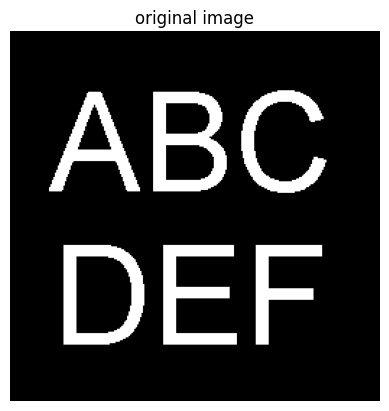

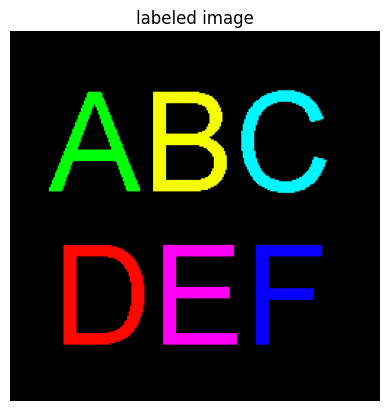

In [10]:
# 결과 표출
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("original image")
plt.show()

plt.imshow(labeled_img)
plt.axis('off')
plt.title("labeled image")
plt.show()
